# 일반화 선형 모형

## 1. 로지스틱 회귀

In [1]:
acs <- read.table("http://jaredlander.com/data/acs_ny.csv",
                 sep=",", header=TRUE, stringsAsFactors=FALSE)

- $150,000 보다 크면 TRUE, 작으면 FALSE

In [2]:
acs$Income <- with(acs, FamilyIncome >= 150000)

In [4]:
install.packages("ggplot2")
install.packages("useful")

package 'ggplot2' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\student\AppData\Local\Temp\RtmpeKM52N\downloaded_packages
package 'useful' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\student\AppData\Local\Temp\RtmpeKM52N\downloaded_packages


In [5]:
library(ggplot2)
library(useful)

- 가계 수입에 대한 밀도 곡선 (수직선은 $150,000 지점을 가리킨다)

Warning message:
"Removed 13 rows containing non-finite values (stat_density)."

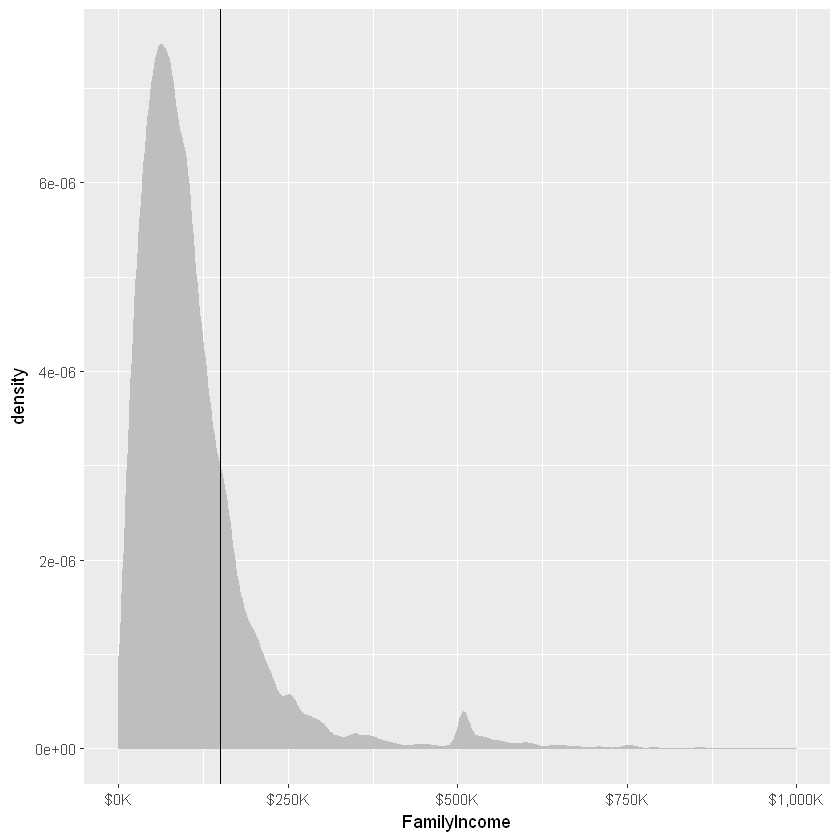

In [7]:
ggplot(acs, aes(x=FamilyIncome))+
geom_density(fill="grey", color="grey")+
geom_vline(xintercept = 150000)+
scale_x_continuous(labels = multiple.dollar, limits=c(0,1000000))

In [8]:
head(acs)

Acres,FamilyIncome,FamilyType,NumBedrooms,NumChildren,NumPeople,NumRooms,NumUnits,NumVehicles,NumWorkers,OwnRent,YearBuilt,HouseCosts,ElectricBill,FoodStamp,HeatingFuel,Insurance,Language,Income
1-10,150,Married,4,1,3,9,Single detached,1,0,Mortgage,1950-1959,1800,90,No,Gas,2500,English,FALSE
1-10,180,Female Head,3,2,4,6,Single detached,2,0,Rented,Before 1939,850,90,No,Oil,0,English,FALSE
1-10,280,Female Head,4,0,2,8,Single detached,3,1,Mortgage,2000-2004,2600,260,No,Oil,6600,Other European,FALSE
1-10,330,Female Head,2,1,2,4,Single detached,1,0,Rented,1950-1959,1800,140,No,Oil,0,English,FALSE
1-10,330,Male Head,3,1,2,5,Single attached,1,0,Mortgage,Before 1939,860,150,No,Gas,660,Spanish,FALSE
1-10,480,Male Head,0,3,4,1,Single detached,0,0,Rented,Before 1939,700,140,No,Gas,0,English,FALSE


In [9]:
income1 <- glm(Income ~ HouseCosts + NumWorkers + OwnRent +
              NumBedrooms + FamilyType,
              data = acs, family = binomial(link="logit"))

In [10]:
summary(income1)


Call:
glm(formula = Income ~ HouseCosts + NumWorkers + OwnRent + NumBedrooms + 
    FamilyType, family = binomial(link = "logit"), data = acs)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.8452  -0.6246  -0.4231  -0.1743   2.9503  

Coefficients:
                      Estimate Std. Error z value Pr(>|z|)    
(Intercept)         -5.738e+00  1.185e-01 -48.421   <2e-16 ***
HouseCosts           7.398e-04  1.724e-05  42.908   <2e-16 ***
NumWorkers           5.611e-01  2.588e-02  21.684   <2e-16 ***
OwnRentOutright      1.772e+00  2.075e-01   8.541   <2e-16 ***
OwnRentRented       -8.886e-01  1.002e-01  -8.872   <2e-16 ***
NumBedrooms          2.339e-01  1.683e-02  13.895   <2e-16 ***
FamilyTypeMale Head  3.336e-01  1.472e-01   2.266   0.0235 *  
FamilyTypeMarried    1.405e+00  8.704e-02  16.143   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 22808  on 22744

In [11]:
library(coefplot)

Warning message:
"Ignoring unknown aesthetics: xmin, xmax"

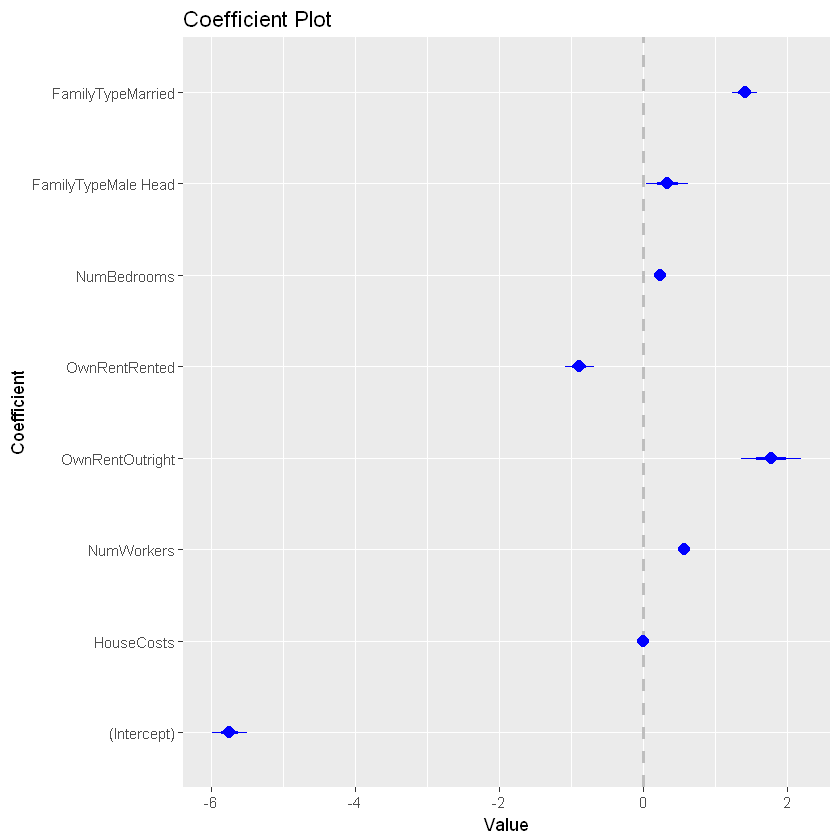

In [12]:
coefplot(income1)

## 2. 포아송 회귀

- count data에 사용 된다
- 다른 일반화 선형 모형과 같이 glm 함수를 호출해 실행

- ACS 데이터의 자녀 수 (NumChildren)를 반응 변수로 사용

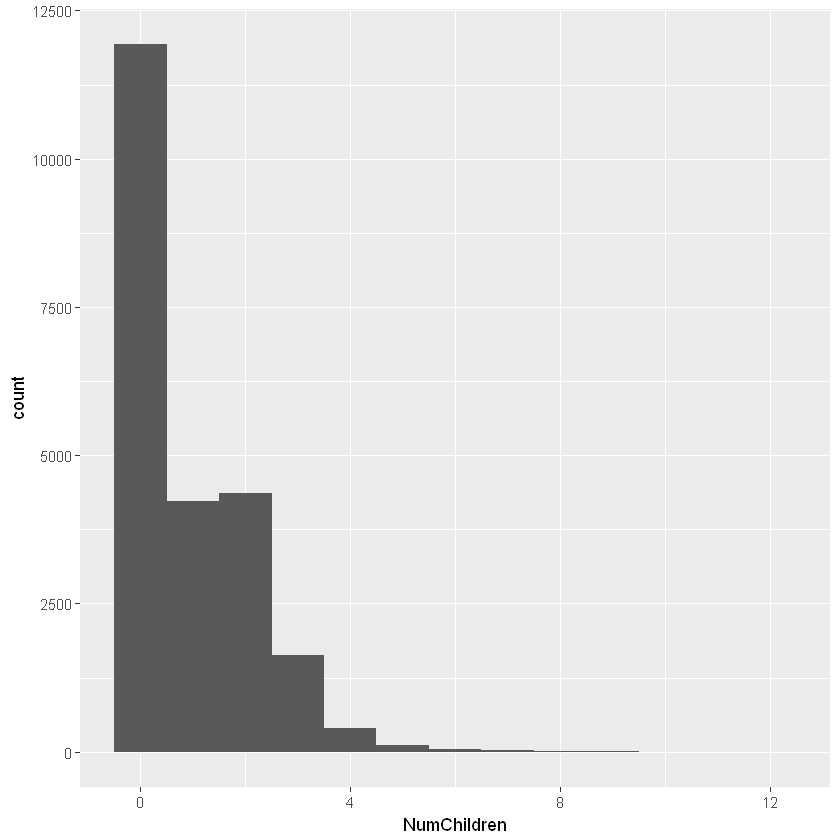

In [13]:
ggplot(acs, aes(x=NumChildren)) + geom_histogram(binwidth=1)

In [16]:
children1 <- glm(NumChildren ~ FamilyIncome + FamilyType + OwnRent,
               data = acs, family = poisson(link="log"))

In [17]:
summary(children1)


Call:
glm(formula = NumChildren ~ FamilyIncome + FamilyType + OwnRent, 
    family = poisson(link = "log"), data = acs)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.9950  -1.3235  -1.2045   0.9464   6.3781  

Coefficients:
                      Estimate Std. Error z value Pr(>|z|)    
(Intercept)         -3.257e-01  2.103e-02 -15.491  < 2e-16 ***
FamilyIncome         5.420e-07  6.572e-08   8.247  < 2e-16 ***
FamilyTypeMale Head -6.298e-02  3.847e-02  -1.637    0.102    
FamilyTypeMarried    1.440e-01  2.147e-02   6.707 1.98e-11 ***
OwnRentOutright     -1.974e+00  2.292e-01  -8.611  < 2e-16 ***
OwnRentRented        4.086e-01  2.067e-02  19.773  < 2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for poisson family taken to be 1)

    Null deviance: 35240  on 22744  degrees of freedom
Residual deviance: 34643  on 22739  degrees of freedom
AIC: 61370

Number of Fisher Scoring iterations: 5


Warning message:
"Ignoring unknown aesthetics: xmin, xmax"

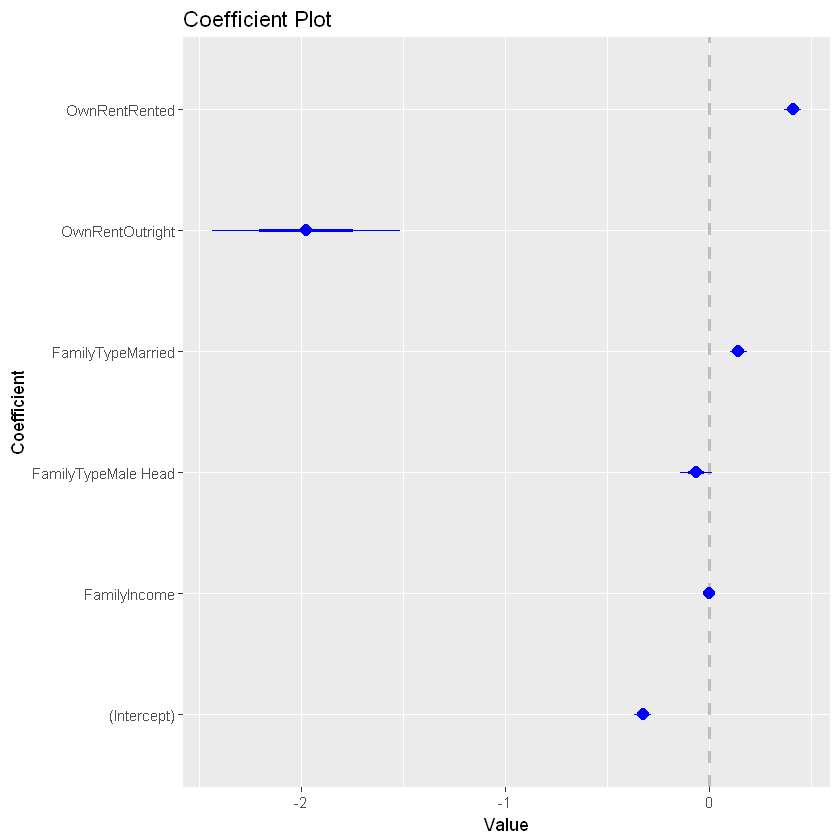

In [18]:
coefplot(children1)

In [19]:
z <- (acs$NumChildren - children$fitted.values) / sqrt(children$fitted.values)

In [20]:
sum(z^2) / children$df.residual

[1] 1.469747

In [21]:
pchisq(sum(z^2), children1$df.residual)

[1] 1

In [22]:
children2 <- glm(NumChildren ~ FamilyIncome + FamilyType + OwnRent,
                data = acs, family = quasipoisson(link="log"))

Warning message:
"Ignoring unknown aesthetics: xmin, xmax"

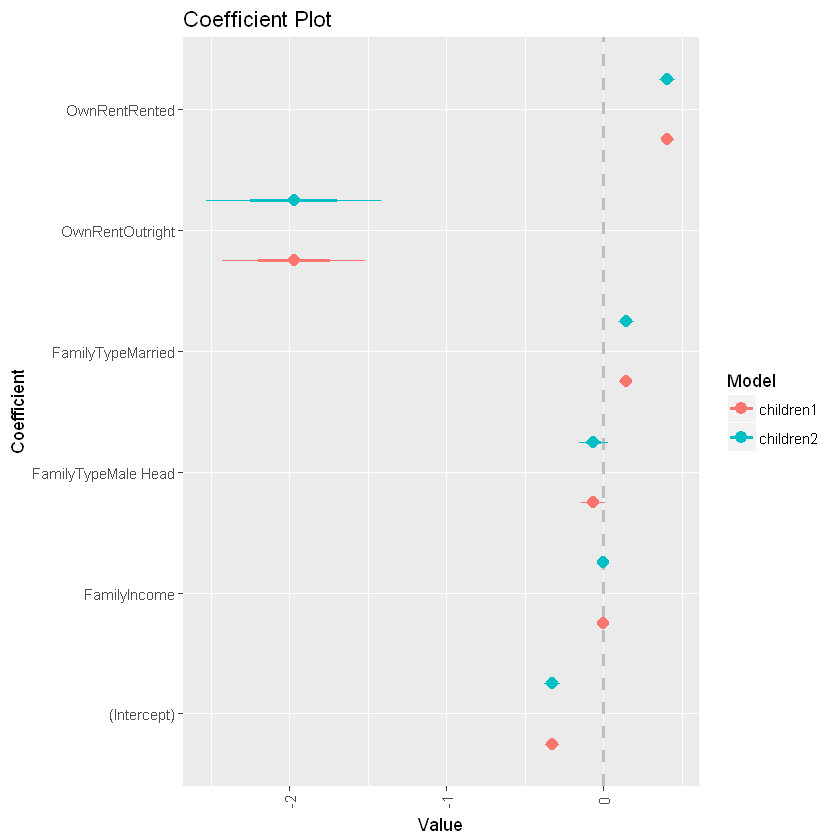

In [23]:
multiplot(children1, children2)